# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sola
Processing Record 2 of Set 1 | aral
Processing Record 3 of Set 1 | sadovoye
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | burang
Processing Record 8 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 9 of Set 1 | brush
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | colonia
Processing Record 12 of Set 1 | padang
Processing Record 13 of Set 1 | bosobolo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | priozersk
Processing Record 16 of Set 1 | palotina
Processing Record 17 of Set 1 | pallisa
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | trincomalee
Processing Record 22 of Set 1 | atafu village
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sola,-13.8833,167.5500,25.37,69,75,7.72,VU,1725517046
1,aral,40.5156,81.2636,26.59,20,4,3.57,CN,1725517047
2,sadovoye,47.7764,44.5089,23.31,38,25,7.66,RU,1725517048
3,adamstown,-25.0660,-130.1015,18.44,59,74,6.68,PN,1725517049
4,nova sintra,14.8667,-24.7167,26.32,85,100,3.05,CV,1725517050


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("/Applications/Data Analysis Bootcamp/UofM-VIRT-DATA-PT-06-2024-U-LOLC/02_Challenges/06_APIs/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("/Applications/Data Analysis Bootcamp/UofM-VIRT-DATA-PT-06-2024-U-LOLC/02_Challenges/06_APIs/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sola,-13.8833,167.5500,25.37,69,75,7.72,VU,1725517046
1,aral,40.5156,81.2636,26.59,20,4,3.57,CN,1725517047
2,sadovoye,47.7764,44.5089,23.31,38,25,7.66,RU,1725517048
3,adamstown,-25.0660,-130.1015,18.44,59,74,6.68,PN,1725517049
4,nova sintra,14.8667,-24.7167,26.32,85,100,3.05,CV,1725517050


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

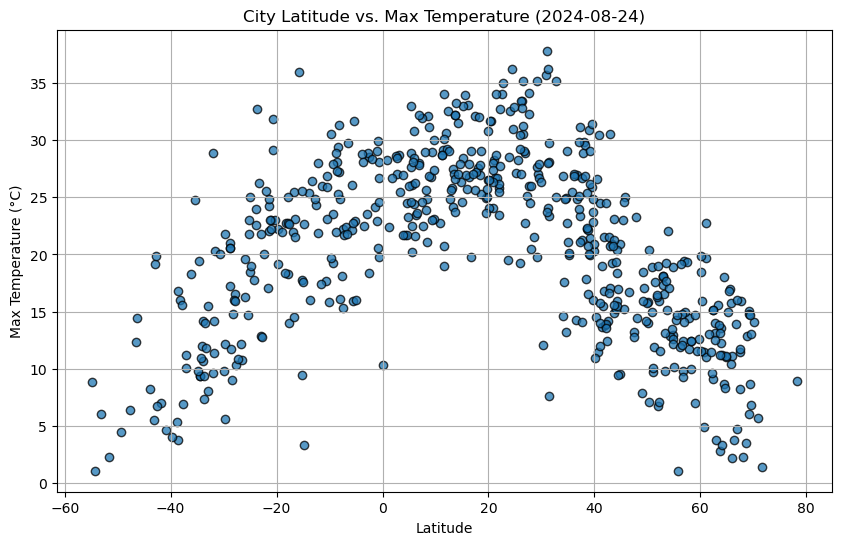

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("/Applications/Data Analysis Bootcamp/UofM-VIRT-DATA-PT-06-2024-U-LOLC/02_Challenges/06_APIs/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

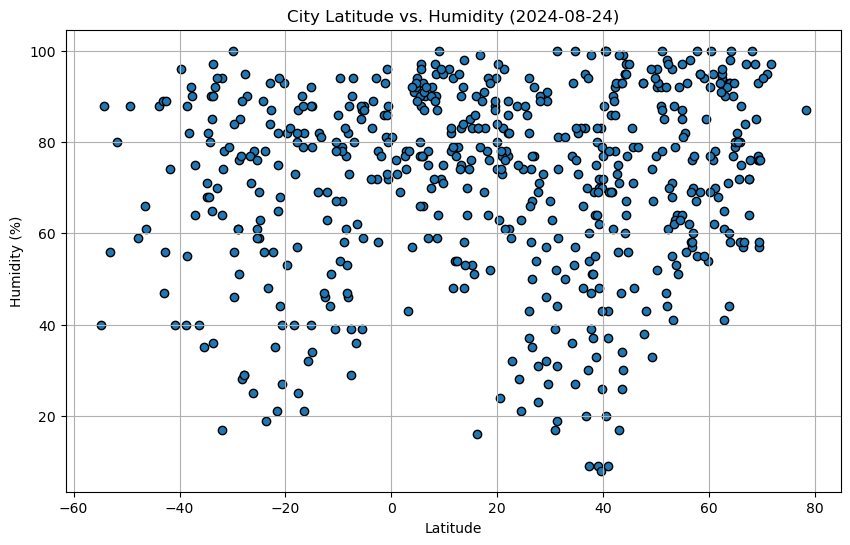

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Applications/Data Analysis Bootcamp/UofM-VIRT-DATA-PT-06-2024-U-LOLC/02_Challenges/06_APIs/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

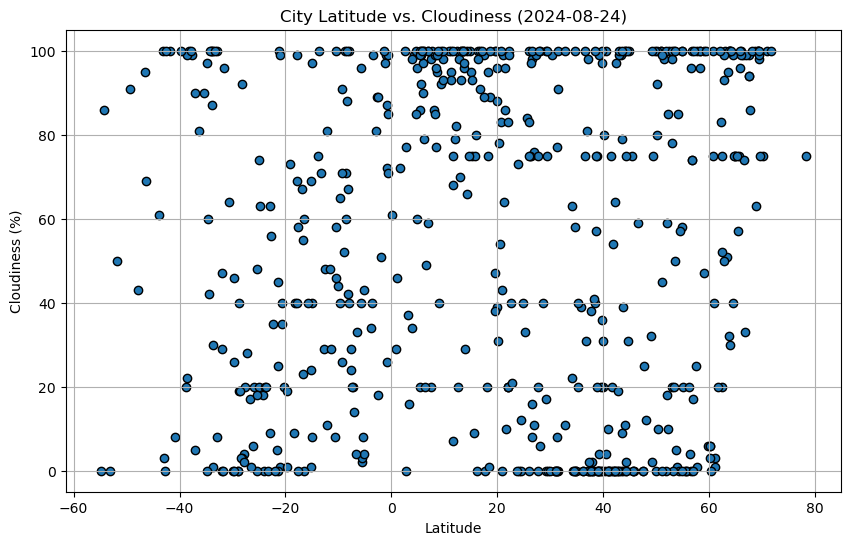

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha= 1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Applications/Data Analysis Bootcamp/UofM-VIRT-DATA-PT-06-2024-U-LOLC/02_Challenges/06_APIs/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

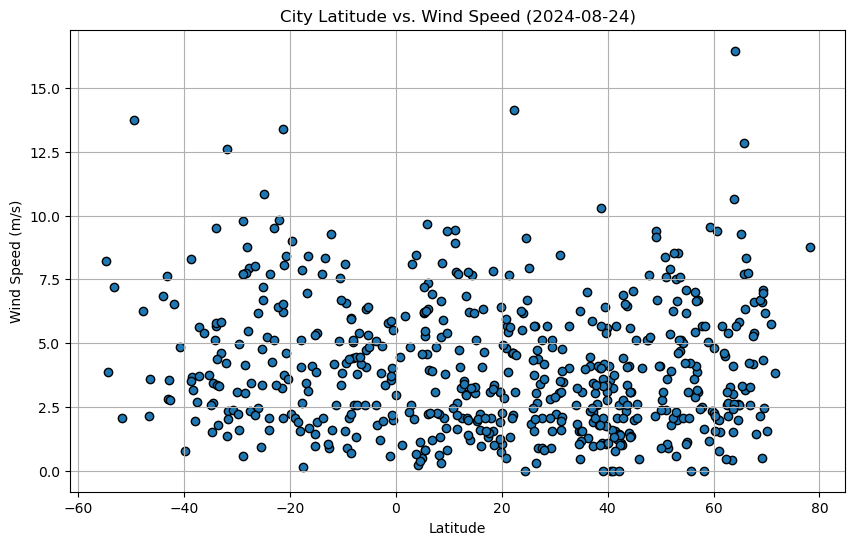

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha= 1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("/Applications/Data Analysis Bootcamp/UofM-VIRT-DATA-PT-06-2024-U-LOLC/02_Challenges/06_APIs/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, line_pos):
    """
    This function creates a scatter plot with a linear regression line and displays the equation and r-value.
    
    Parameters:
    x_values (array-like): Data for the x-axis
    y_values (array-like): Data for the y-axis
    x_label (str): Label for the x-axis
    y_label (str): Label for the y-axis
    title (str): Title of the plot
    line_pos (tuple): Coordinates for positioning the regression line equation
    
    Returns:
    None
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Annotate the line equation (y = mx + b)
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}", line_pos, fontsize=12, color="red")
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show plot
    plt.show()

    # Print the equation and R-squared value to the console
    print(f"Equation of the line: y = {slope:.2f}x + {intercept:.2f}")
    print(f"The R² value is: {r_value**2:.2f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aral,40.5156,81.2636,26.59,20,4,3.57,CN,1725517047
2,sadovoye,47.7764,44.5089,23.31,38,25,7.66,RU,1725517048
4,nova sintra,14.8667,-24.7167,26.32,85,100,3.05,CV,1725517050
5,tazovsky,67.4667,78.7000,8.22,64,99,4.20,RU,1725517051
6,burang,30.2500,81.1667,12.12,63,99,2.23,CN,1725517052


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sola,-13.8833,167.5500,25.37,69,75,7.72,VU,1725517046
3,adamstown,-25.0660,-130.1015,18.44,59,74,6.68,PN,1725517049
8,waitangi,-43.9535,-176.5597,8.23,88,61,6.86,NZ,1725517056
10,padang,-0.9492,100.3543,29.03,81,99,3.57,ID,1725517058
14,palotina,-24.2839,-53.8400,17.75,89,18,5.26,BR,1725517062


###  Temperature vs. Latitude Linear Regression Plot

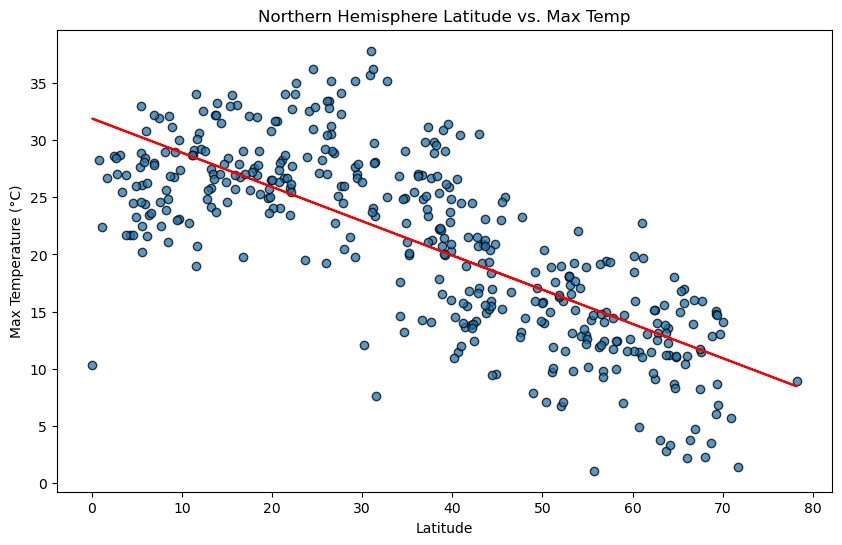

Equation of the line: y = -0.30x + 31.89
The R² value is: 0.56


In [30]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Northern Hemisphere Latitude vs. Max Temp", 
    (10, -20)
)

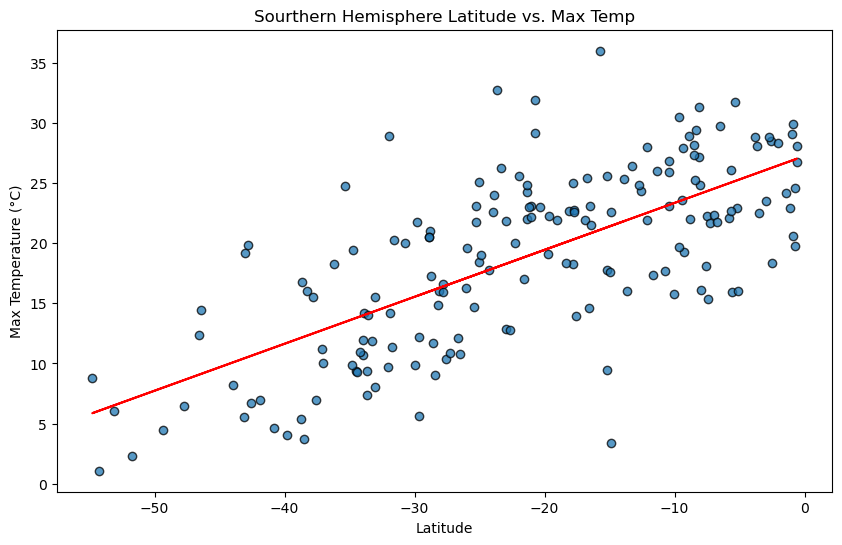

Equation of the line: y = 0.39x + 27.25
The R² value is: 0.49


In [31]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Sourthern Hemisphere Latitude vs. Max Temp", 
    (10, -20)
)

**Discussion about the linear relationship:** The linear relationship for the Northern hemisphere show that for every increase in latitude, the temperature decreases by .30 units. The linear relationship of the southern hemisphere is the inverse. As you get torward the equator, or increase the latitude, the temperature increases by .39 units. 

### Humidity vs. Latitude Linear Regression Plot

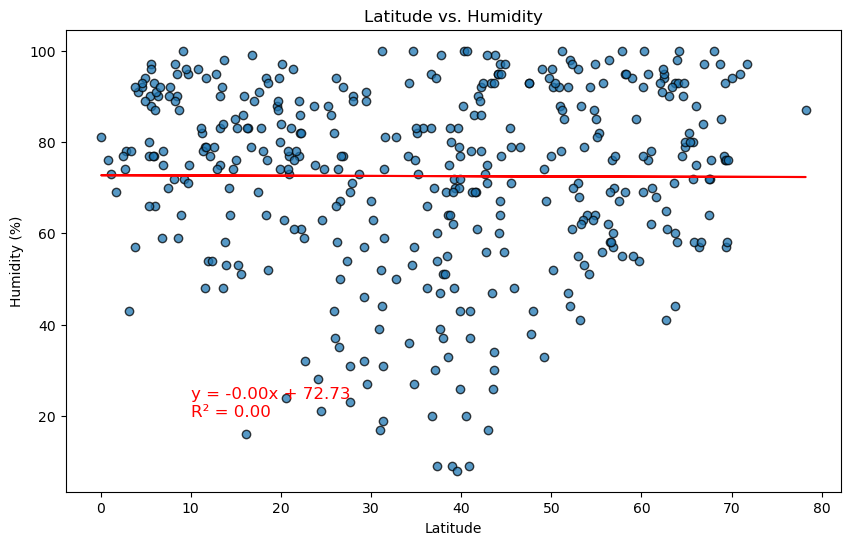

Equation of the line: y = -0.00x + 72.73
The R² value is: 0.00


In [32]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Latitude vs. Humidity", 
    (10, 20)
)

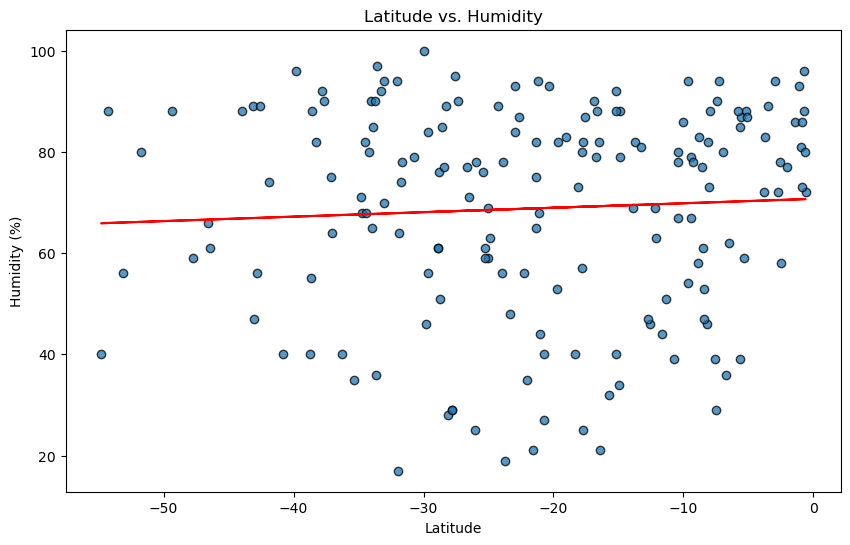

Equation of the line: y = 0.09x + 70.73
The R² value is: 0.00


In [34]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Latitude vs. Humidity", 
    (10, 20)
)

**Discussion about the linear relationship:** The Northern hemisphere has no significant coorelation between latitude and humidity. The southern hemisphere has more of a relationship .09 units increase in humidity for an increase in latitude. Both of the R squared values being zero means there is no predictability of these variables.

### Cloudiness vs. Latitude Linear Regression Plot

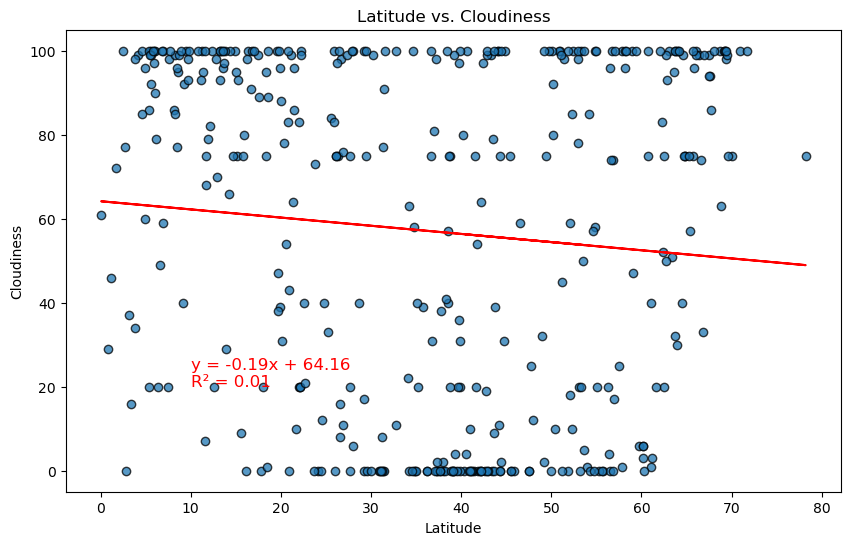

Equation of the line: y = -0.19x + 64.16
The R² value is: 0.01


In [35]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness", 
    "Latitude vs. Cloudiness", 
    (10, 20)
)

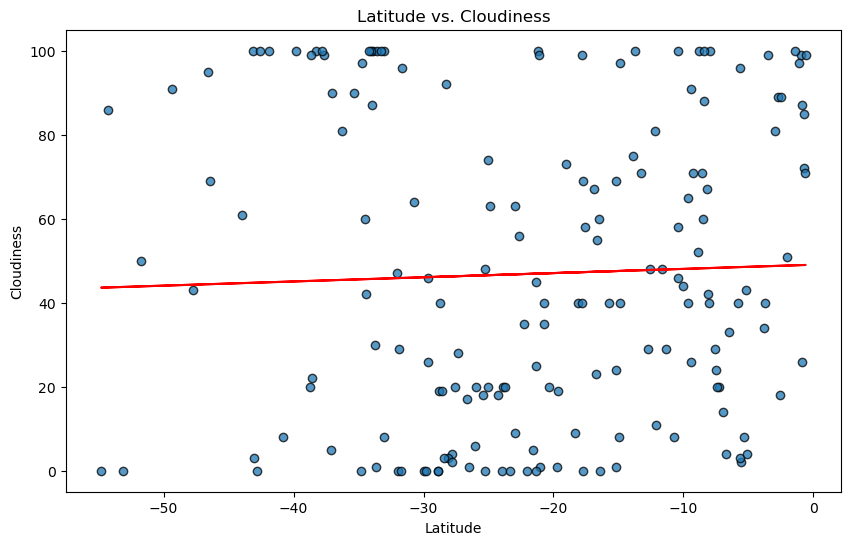

Equation of the line: y = 0.10x + 49.05
The R² value is: 0.00


In [38]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness", 
    "Latitude vs. Cloudiness", 
    (10, 20)
)

**Discussion about the linear relationship:** The northern hemisphere has a negative relationship with latitude and cloudiness. The r squared value tells you that only 1% of the variation in humidity is explained by latitude. As you increase latitude, the cloudiness decreases by .19 units. The southern hemisphere has a positive relationship with latitude and cloudiness, as you move closer to the equator. The 0% of the r squared value indicates that there is not a signifigant predictor in latitude to cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

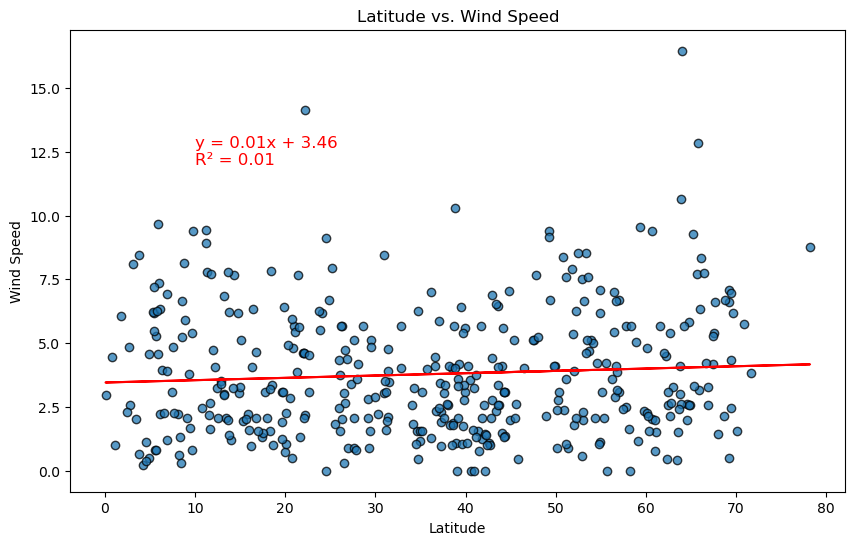

Equation of the line: y = 0.01x + 3.46
The R² value is: 0.01


In [37]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed", 
    "Latitude vs. Wind Speed", 
    (10, 12)
)

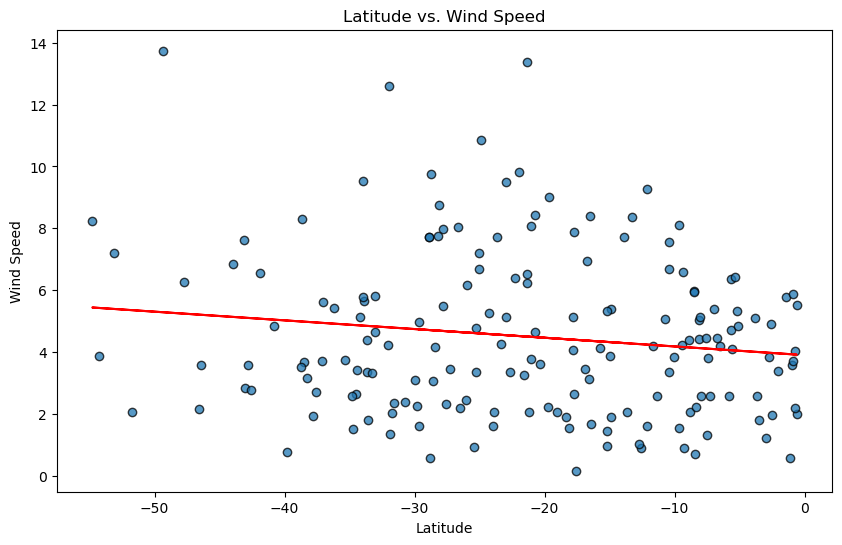

Equation of the line: y = -0.03x + 3.90
The R² value is: 0.02


In [39]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed", 
    "Latitude vs. Wind Speed", 
    (10, 12)
)

**Discussion about the linear relationship:** Northern hemisphere, there is a slight positive relationship between an increase in latitude and wind speed. There is a 1% influence on latitude and wind speed, suggesting there are other factors that determine the dependent variable. For the southern hemisphere For Southern hemisphere, there is a stronger relationship between latitude and wind speed than the northern hemisphere. There is also a 2% influence of latitude on windspeed, more of an indicator in the southern hemisphere than the north. 